# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
# your code here- numerical variable
titanic.select_dtypes(include='number').columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [7]:
#your code here- categorical variable
titanic.select_dtypes(include='object').columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [8]:
# your code here
plt.style.use('classic')
fig = plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

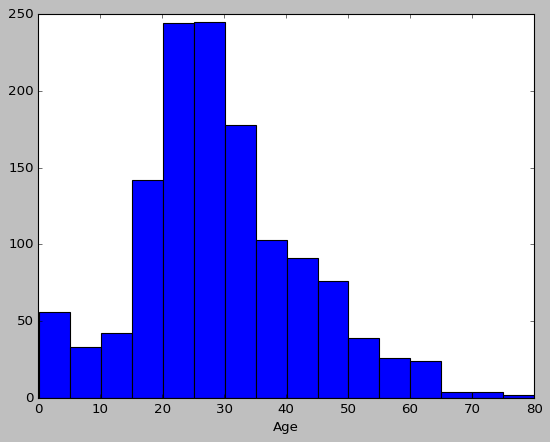

In [13]:
# your code here
plt.hist(titanic['Age'], bins=16)
plt.xlabel('Age')
plt.show()

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

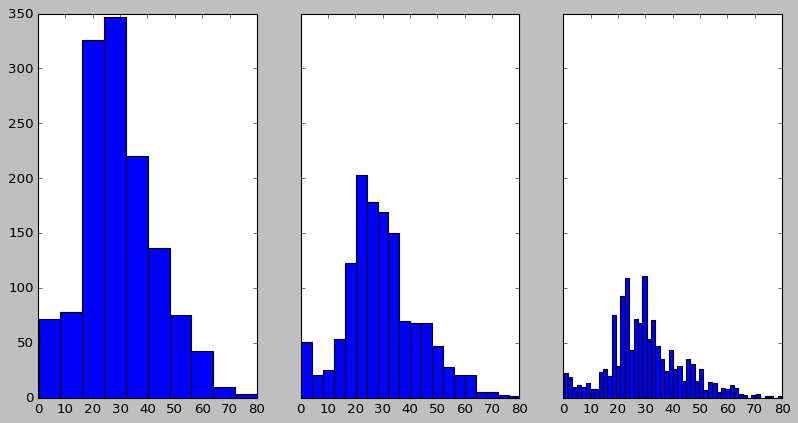

In [20]:
# your code here
fig, axs = plt.subplots(1,3, figsize=(12,6), sharey=True)

axs[0].hist(titanic['Age'], bins=10)

axs[1].hist(titanic['Age'], bins=20)

axs[2].hist(titanic['Age'], bins=50)

plt.show()

#### Whether the bin size affects your plot? Why?

In [ ]:
# your comment here
# Mientras mayor sea la canidad de bins, menores son los valores en y y esto es debido a que menos
# peronas entran por intervalo. Sin embargo, podemos notar que la forma se mantiene
# aunque se hce mas granular.

#### Use seaborn to show the distribution of the column `Age`

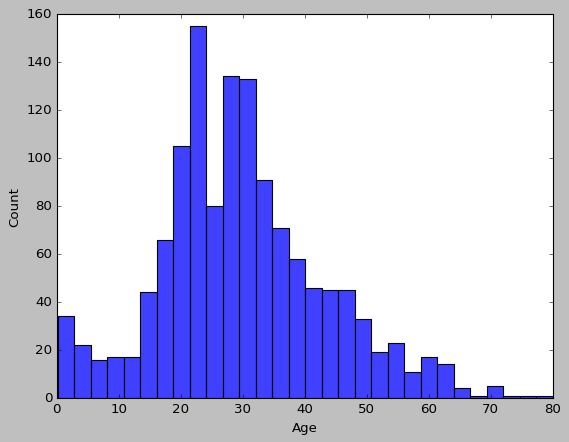

In [22]:
# your code here
sns.histplot(titanic['Age'])
plt.show()

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

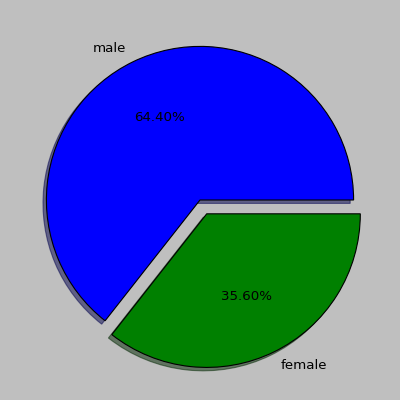

In [32]:
# your code here- 1st way
genders = titanic['Gender'].value_counts()
plt.pie(genders.values, labels = genders.index, autopct='%1.2f%%', shadow=True, explode=(0, .1))
plt.show()

In [ ]:
# your code here- 2nd way


#### Use the appropriate plot to visualize the column `Pclass` 


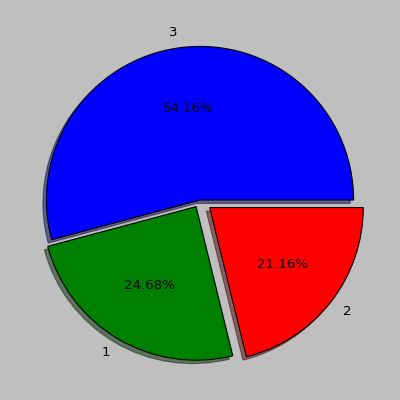

In [38]:
# your code here
pclass = titanic['Pclass'].value_counts()
plt.pie(pclass.values, labels = pclass.index, autopct='%1.2f%%', shadow=True, explode=(0, .05, .08))
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

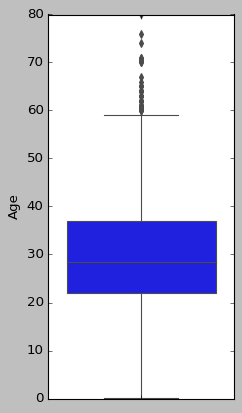

In [42]:
# your code here
fig = plt.figure(figsize=(3, 6))
sns.boxplot(y=titanic['Age'])
plt.show()

#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here
# Podemos notar que la mitad de los pasageros estan en 
# el rango de edades de ~20 y ~36

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

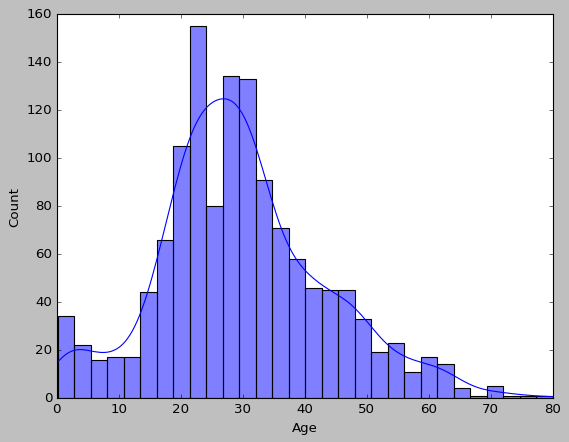

In [65]:
#your code here
sns.histplot(titanic['Age'], kde=True)
plt.show()

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
# your comment here
# 

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

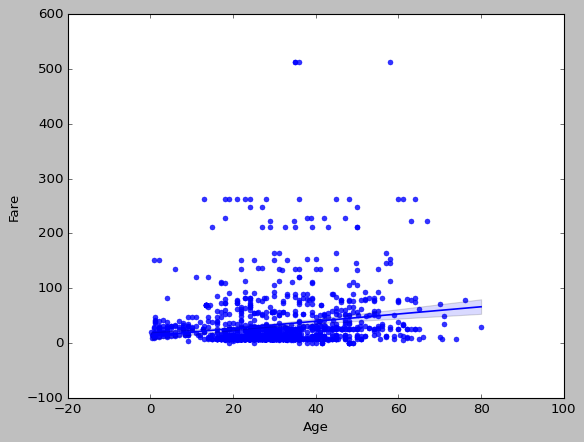

In [51]:
#your code-1st way
sns.regplot(x=titanic['Age'], y=titanic['Fare'])
plt.show()

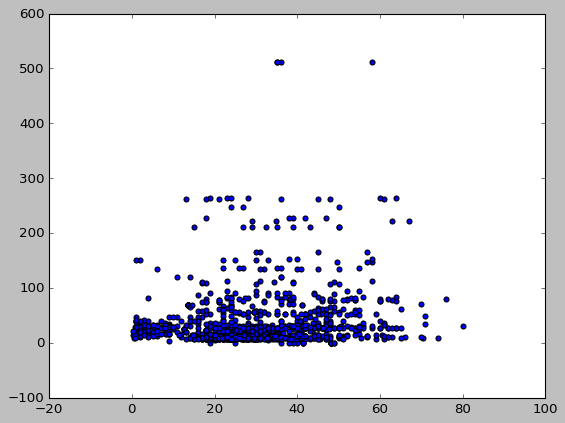

In [53]:
# your code-2nd way
plt.scatter(titanic['Age'], titanic['Fare'])
plt.show()

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

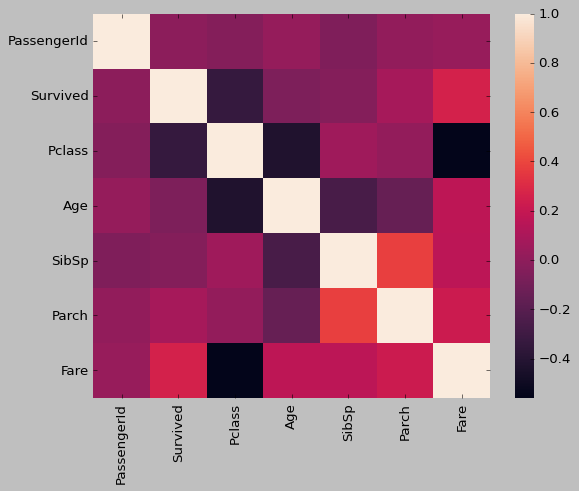

In [56]:
#your code here
titanic_corr = titanic.corr()
sns.heatmap(titanic_corr)
plt.show()

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
# your comment here
# Podemos notar varias cosas
# - Muchos viajaban en familia.
# - Habia mayor probabilidad de sobrevivir si se pago mas o si era de primera clase.
# - Los pasajeros de primera clase tenian edades sobre el promedio.

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

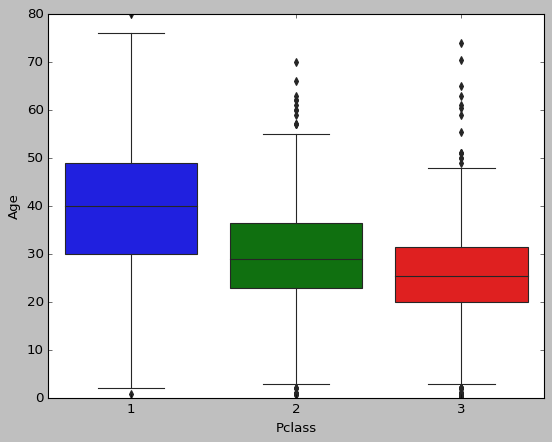

In [58]:
#your code here
sns.boxplot(x=titanic['Pclass'], y=titanic['Age'])
plt.show()

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

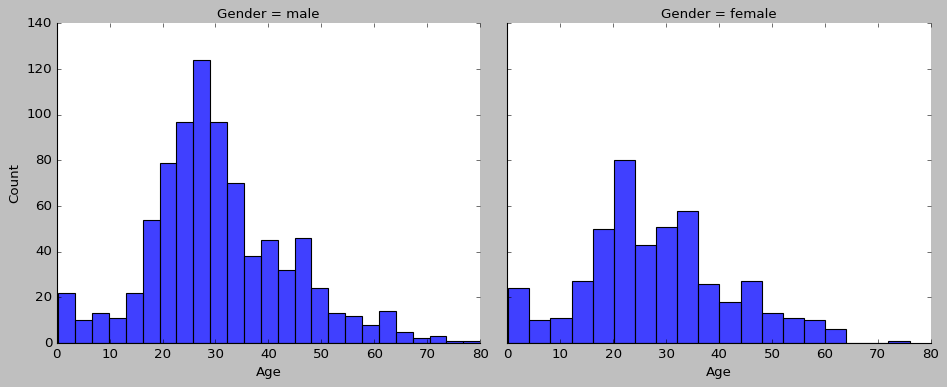

In [70]:
#your code here
g = sns.FacetGrid(titanic, col='Gender', height=5, aspect=1.2)
g.map(sns.histplot, 'Age')
plt.show()